<h1 align='center'>Categorical Encoding<h1\>

Typically, any structured dataset includes multiple columns – a combination of numerical as well as categorical variables. A machine can only understand the numbers. It cannot understand the text. That’s essentially the case with Machine Learning algorithms too.

That’s primarily the reason we need to **convert categorical columns to numerical columns** so that a machine learning algorithm understands it. This process is called categorical encoding.

    Categorical encoding is a process of converting categories to numbers.

Lets discuss the approches towards handling categorical variables.

## Label Encoding

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on **alphabetical ordering.**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

#reading the dataset
df=pd.read_csv("Salary.csv")
df

,Country,Age,Salary
0,India,44,72000
1,US,34,65000
2,Japan,46,98000
3,US,35,45000
4,Japan,23,34000


In [2]:
df.info

<bound method DataFrame.info of   Country  Age  Salary
0   India   44   72000
1      US   34   65000
2   Japan   46   98000
3      US   35   45000
4   Japan   23   34000>

In [3]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['Country']= label_encoder.fit_transform(df['Country']) 
print(df.head())

   Country  Age  Salary
0        0   44   72000
1        2   34   65000
2        1   46   98000
3        2   35   45000
4        1   23   34000


#### Challenges with Label Encoding
In the above scenario, the Country names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between countries such as India < Japan < the US.

This is something that we do not want! So how can we overcome this obstacle? Here comes the concept of One-Hot Encoding.

## One-Hot Encoding


One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

        One-Hot Encoding is the process of creating dummy variables.

In this encoding technique, each category is represented as a one-hot vector. 

Let’s see how to implement one-hot encoding in Python:

In [4]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.Country.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(df.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)
#droping the country column 
df= df.drop(['Country'], axis=1) 
#printing to verify 
print(df.head())

   Age  Salary  Country_0  Country_1  Country_2
0   44   72000        1.0        0.0        0.0
1   34   65000        0.0        0.0        1.0
2   46   98000        0.0        1.0        0.0
3   35   45000        0.0        0.0        1.0
4   23   34000        0.0        1.0        0.0


### Dummy Variable Trap
One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.

    Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

The Dummy Variable Trap leads to the problem known as multicollinearity. **Multicollinearity** occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

**So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped.**

### When to use a Label Encoding vs. One Hot Encoding

We apply One-Hot Encoding when:

    - The categorical feature is not ordinal (like the countries above).
    - The number of categorical features is less so one-hot encoding can be effectively applied.
<br>
We apply Label Encoding when:

    - The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school).
    - The number of categories is quite large as one-hot encoding can lead to high memory consumption.


___
___

<h1 align='center'> Feature Scaling <h1\>

**Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Example: If an algorithm is not using the feature scaling method then it can consider the value 3000 meters to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to the same magnitudes and thus, tackle this issue.

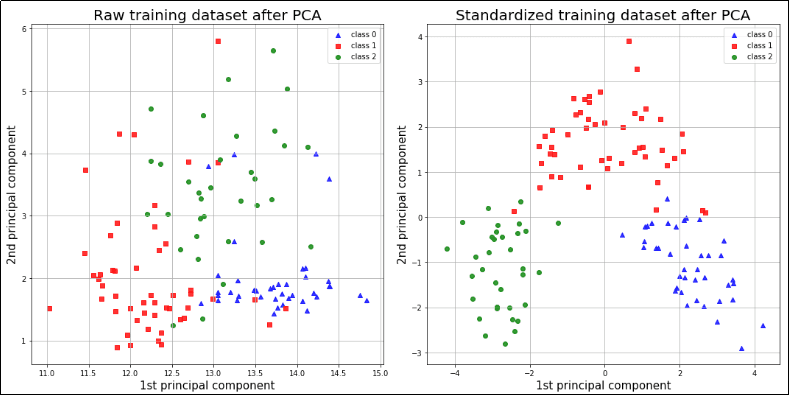

## Types of Feature Scaling <br>
### Normalization

Normalization is the process of scaling data into a range of [0, 1]. It's more useful and common for regression tasks.

### Standardization

Standardization is the process of scaling data so that they have a mean value of 0 and a standard deviation of 1. It's more useful and common for classification tasks.

Let's import the data and take a look at some of the features we'll be using:

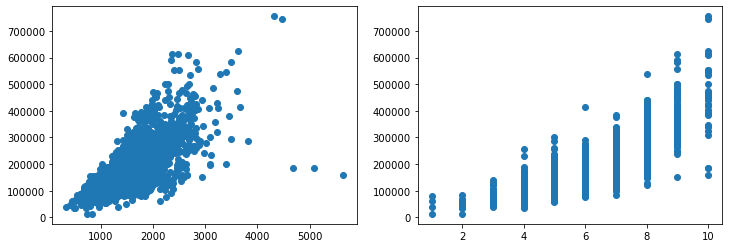

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Dataset
df = pd.read_csv('AmesHousing.csv')
# Single out a couple of predictor variables and labels ('SalePrice' is our target label set)
x = df[['Gr Liv Area', 'Overall Qual']].values
y = df['SalePrice'].values

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].scatter(x[:,0], y)
ax[1].scatter(x[:,1], y)

plt.show()

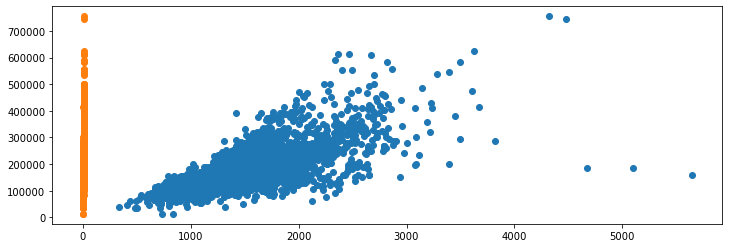

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

(array([  4.,  13.,  40., 226., 825., 732., 602., 350., 107.,  31.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

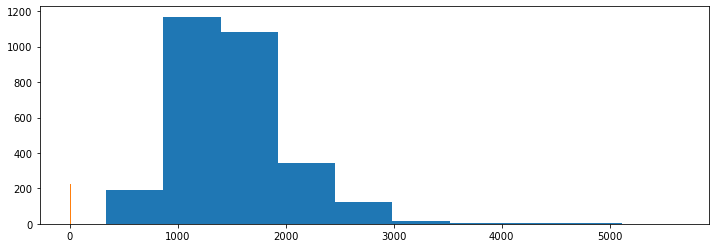

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(x[:,0])
ax.hist(x[:,1])

<br>

#### The StandardScaler class is used to transform the data by standardizing it. Let's import it and scale the data via its `fit_transform()` method:

(array([  4.,  13.,  40., 226., 825., 732., 602., 350., 107.,  31.]),
 array([-3.61137917, -2.97343659, -2.335494  , -1.69755142, -1.05960884,
        -0.42166626,  0.21627632,  0.85421891,  1.49216149,  2.13010407,
         2.76804665]),
 <BarContainer object of 10 artists>)

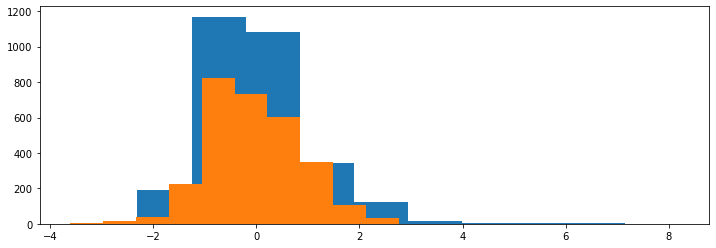

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.hist(x_std[:,0])
ax.hist(x_std[:,1])

If we were to plot these through Scatter Plots yet again, we'd perhaps more clearly see the effects of the standarization:

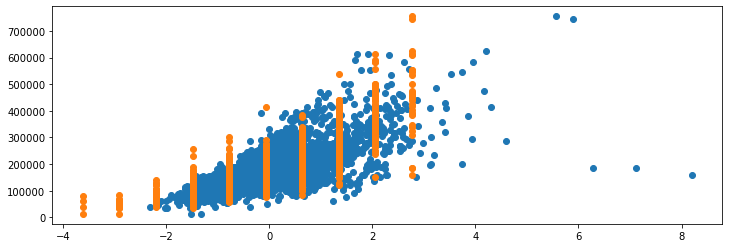

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

ax.scatter(x_std[:,0], y)
ax.scatter(x_std[:,1], y)

<br>

#### To normalize features, we use the MinMaxScaler class. It works in much the same way as StandardScaler, but uses a fundementally different approach to scaling the data:

(array([  4.,  13.,  40., 226., 825., 732., 602., 350., 107.,  31.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

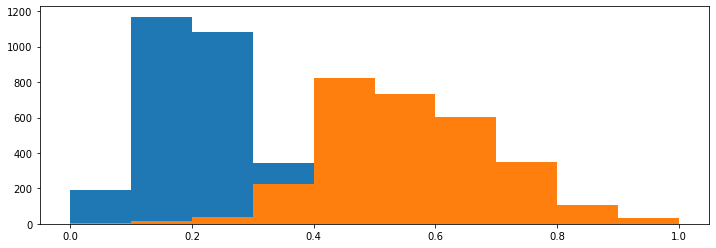

In [10]:
from sklearn.preprocessing import MinMaxScaler

fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

ax.hist(x_minmax [:,0])
ax.hist(x_minmax [:,1])

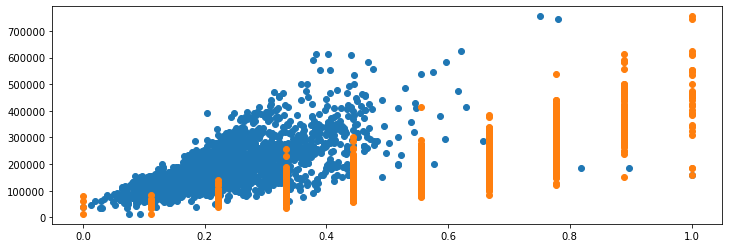

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

ax.scatter(x_minmax [:,0], y)
ax.scatter(x_minmax [:,1], y)

___